## Importing dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [0]:
X = dataset.iloc[: , [3,4]].values
X

# Using elbow method to find optimal number of cluster

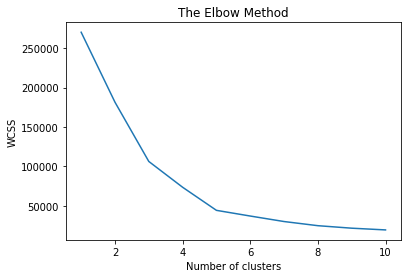

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Applying K Means to the dataset clusters with 5

In [0]:
kmeans = KMeans(n_clusters=5 , init = 'k-means++' , max_iter=300 , n_init=10 , random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

## Visualizing the Clusters

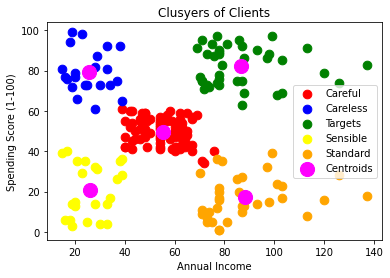

In [15]:
plt.scatter(X[y_kmeans==0 , 0], X[y_kmeans ==0 , 1] , s = 75 ,c ='red' , label = 'Careful')
plt.scatter(X[y_kmeans==1 , 0], X[y_kmeans ==1 , 1] , s = 75 ,c ='blue' , label = 'Careless')
plt.scatter(X[y_kmeans==2 , 0], X[y_kmeans ==2 , 1] , s = 75 ,c ='green' , label = 'Targets')
plt.scatter(X[y_kmeans==3 , 0], X[y_kmeans ==3 , 1] , s = 75 ,c ='yellow' , label = 'Sensible')
plt.scatter(X[y_kmeans==4 , 0], X[y_kmeans ==4 , 1] , s = 75 ,c ='orange' , label = 'Standard')
plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[: ,1]  , s = 200 ,c ='magenta' , label = 'Centroids')
plt.title('Clusyers of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()